# `K Nearest Neighbors --------------------------------------`
### [KNN from scratch](https://github.com/manujjoshi/Innomatics-Internship/blob/main/Algo%20from%20scratch/KNN%20from%20scratch.ipynb)
- **Lazy evaluation**
- **K will be always odd, to avoid ambiguity**
![](https://www.researchgate.net/profile/Mahua-Bhattacharya/publication/264823819/figure/fig1/AS:651533758787592@1532349161929/The-curse-of-dimensionality-a-11-objects-in-one-unit-bin-b-6-objects-in-one-unit-bin.png)
![](http://www.visiondummy.com/wp-content/uploads/2014/04/dimensionality_vs_performance.png)
### `For Categorical data, they will be using hamming distance`
![](https://i.ytimg.com/vi/7SVSXiWc0-o/maxresdefault.jpg)
- K=13 is best K value , by Milan sir experience

In [16]:
import pandas as pd
import seaborn as sns

In [17]:
data = pd.read_csv("KNNData.csv")

In [18]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### `all are numeric columns`

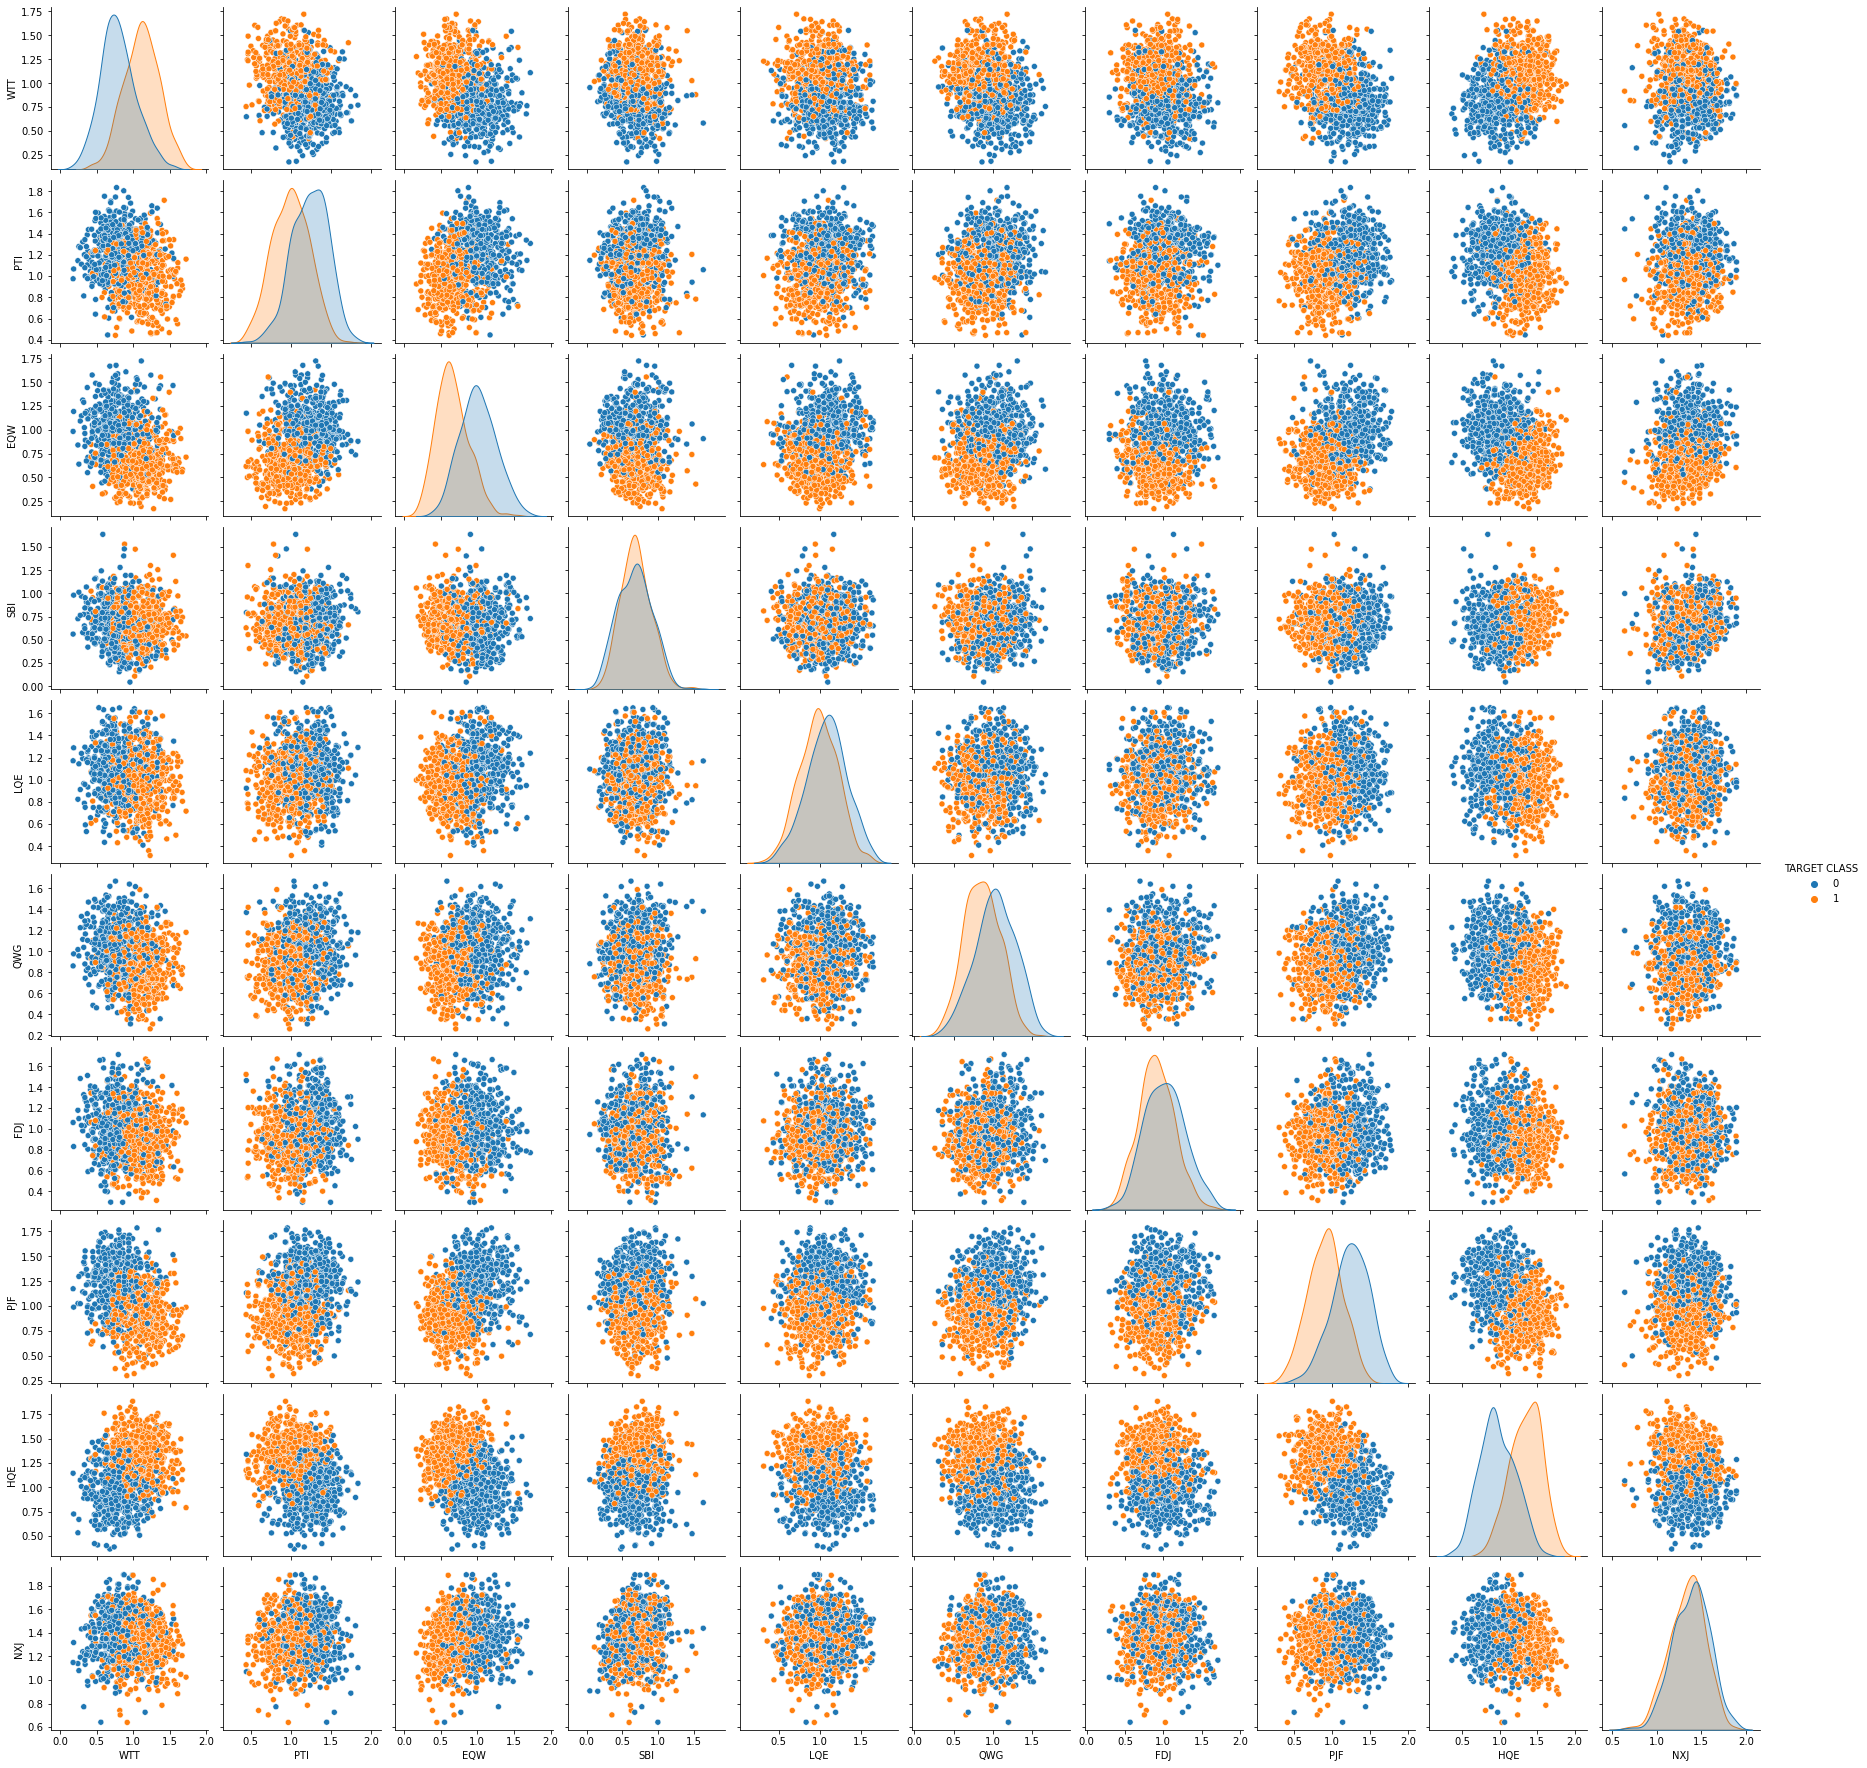

In [19]:
sns.pairplot(data,hue="TARGET CLASS")

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop("TARGET CLASS",axis=1)
y = data["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### `min max normalisation`

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler()
min_max_sc.fit(X_train)
X_train = min_max_sc.transform(X_train)
X_test = min_max_sc.transform(X_test)

In [22]:
X_train

array([[0.73626705, 0.3473278 , 0.        , ..., 0.4880455 , 0.67604197,
        0.44136369],
       [0.36535758, 0.26299562, 0.39528755, ..., 0.29303549, 0.81667876,
        0.38407843],
       [0.39726962, 1.        , 0.45635053, ..., 0.63370051, 0.44449552,
        0.33662259],
       ...,
       [0.00488658, 0.44920068, 0.65820968, ..., 0.463663  , 0.23708141,
        0.5163488 ],
       [0.25928926, 0.39713544, 0.38664815, ..., 0.82120137, 0.57255294,
        0.68964551],
       [0.40804357, 0.55102979, 0.91305549, ..., 0.58564648, 0.27149387,
        0.64761316]])

## `KNN ------------------------------------------------------------------------`

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=3,p=2)   # p=2 euclid distnace
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9133333333333333
Precision score is 0.8695652173913043
Recall score is 0.9655172413793104
misclassification error 0.08666666666666667


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9066666666666666
Precision score is 0.8633540372670807
Recall score is 0.9586206896551724
misclassification error 0.09333333333333334


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.91
Precision score is 0.86875
Recall score is 0.9586206896551724
misclassification error 0.09


### `Same things by iteration`

In [26]:
misclassification_error = []
for i in range(3,15,2):
    print(f"Fitting KNN with k == {i}\n~~~~~~~~~~~~~~~~~~~")
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train,y_train)
    y_pred  = knn.predict(X_test)
    print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
    print(f"Precision score is {precision_score(y_test,y_pred)}")
    print(f"Recall score is {recall_score(y_test,y_pred)}")
    miss_error = sum((y_pred != y_test))/ X_test.shape[0]
    print(f"misclassification error { miss_error}")
    print("",end="\n\n\n")
    misclassification_error.append(miss_error)

Fitting KNN with k == 3
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9133333333333333
Precision score is 0.8695652173913043
Recall score is 0.9655172413793104
misclassification error 0.08666666666666667



Fitting KNN with k == 5
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9066666666666666
Precision score is 0.8633540372670807
Recall score is 0.9586206896551724
misclassification error 0.09333333333333334



Fitting KNN with k == 7
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.91
Precision score is 0.86875
Recall score is 0.9586206896551724
misclassification error 0.09



Fitting KNN with k == 9
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.91
Precision score is 0.8597560975609756
Recall score is 0.9724137931034482
misclassification error 0.09



Fitting KNN with k == 11
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9166666666666666
Precision score is 0.8703703703703703
Recall score is 0.9724137931034482
misclassification error 0.08333333333333333



Fitting KNN with k == 13
~~~~~~~~~~~~~~~~~~~
Accuracy score is 

### `plot misclassification`

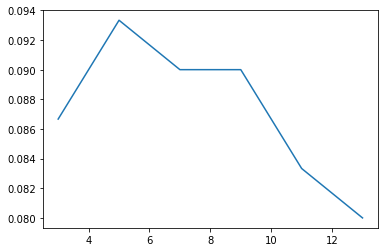

In [27]:
import matplotlib.pyplot as plt

plt.plot(list(range(3,15,2)),misclassification_error)

## `grid search for KNN`

In [28]:
parameters = {
    "n_neighbors": list(range(3,17,2)),
    "p":[1,2]
}

### `It's completely depends upon business case, that you have to find wrt precision or accuracy`

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="precision")
grid.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             scoring='precision')

In [34]:
grid.best_params_

{'n_neighbors': 11, 'p': 2}

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=11,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9166666666666666
Precision score is 0.8703703703703703
Recall score is 0.9724137931034482
misclassification error 0.08333333333333333


## `END ---------------------------------------------------------------------`